# Libraries & Global variables

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
import json

import os
import time

# from sklearn.model_selection import train_test_split

# %load_ext autoreload
# %autoreload 2
# import FusionModel_tools as fm
# import importlib
# importlib.reload(fm)

# import nltk
# nltk.download('popular', quiet = True)


In [2]:
## define general parameters

myseed = 123

splitting_path = '../Splitted_datasets/'
preprocessing_path = '../Preprocessed_data/'
training_path = '../Trained_models_and_metrics/'


# Reloading datasets: 
**Chose at which stage the dataset is goind to be imported:**
* Raw data after train - test splitting.  
* Preprocessed datasets after cleaning and feature engineering.  
* Transformed datasets into np.arrays and/or sparce matrices ready to feed into the ML models

## Option_1: Raw datasets after train - test spliting

In [3]:
# df_X_train = pd.read_csv(splitting_path + '2308141811_df_X_train.csv', index_col = 0, header = 0)
# df_X_test = pd.read_csv(splitting_path + '2308141811_df_X_test.csv', index_col = 0, header = 0)
# df_y_train = pd.read_csv(splitting_path + '2308141811_df_y_train.csv', index_col = 0, header = 0)
# df_y_test = pd.read_csv(splitting_path + '2308141811_df_y_test.csv', index_col = 0, header = 0)

In [4]:
# print(df_X_train.index)
# df_X_train.head()

In [5]:
# print(df_X_test.index)
# df_X_test.head()

In [6]:
# print(df_y_train.index)
# df_y_train.head()

In [7]:
# print(df_y_test.index)
# df_y_test.head()

## Option_2: preprocessed dataset after feature engineering
Include target dataset if not imported before.

In [8]:
# df_X_train_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_train_preprocess.csv', header = 0, index_col = 0, sep = ',')
# df_X_test_preprocess = pd.read_csv(preprocessing_path+'2308141824_df_X_test_preprocess.csv', header = 0, index_col = 0, sep = ',')
# # df_y_train = pd.read_csv( splitting_path+'2308141811_df_y_train.csv', header = 0, index_col = 0, sep = ',')
# # df_y_test = pd.read_csv( splitting_path+'2308141811_df_y_test.csv', header = 0, index_col = 0, sep = ',')

In [9]:
# print(df_X_train_preprocess.index)
# df_X_train_preprocess.head()

In [10]:
# print(df_X_test_preprocess.index)
# df_X_test_preprocess.head()

## Option_3: Transformed data, ready to feed into the ML models
Uncomment cells below to verify consistency of the imported datasets or the properties of the associated transformers

**Features**

In [3]:
from scipy import sparse

text_data = {}

text_data['X_train'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_train.npz")
text_data['X_test'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_test.npz")

In [103]:
# print(text_data['X_train'].shape)
# text_data['X_train'].toarray()[14,:25]

In [104]:
# print(text_data['X_test'].shape)
# text_data['X_test'].toarray()[14,:25]

**Targets**

In [4]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")

In [15]:
# print(targets['y_train'].shape)
# print(targets['y_train'][:5,:])
# print(targets['y_train'][:5,:].argmax(axis = 1))

In [16]:
# print(targets['y_test'].shape)
# print(targets['y_test'][:5,:])
# print(targets['y_test'][:5,:].argmax(axis = 1))

**Transformers**

In [19]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

In [18]:
# print(token_len_scaler.data_min_)
# print(token_len_scaler.data_max_)
# print(token_len_scaler.scale_)
# print(token_len_scaler.n_features_in_)
# print(token_len_scaler.n_samples_seen_)
# print(token_len_scaler.feature_names_in_)

In [19]:
# print(language_encoder.categories_)
# print(language_encoder.n_features_in_)
# print(language_encoder.feature_names_in_)

In [20]:
# print(len(lemmas_vectorizer.vocabulary_),'\n')
# print(dict(list(lemmas_vectorizer.vocabulary_.items() )[:25]),'\n' )
# print(list(lemmas_vectorizer.stop_words_)[:25])

In [21]:
# print(target_encoder.classes_)

## product categories

In [39]:
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';')
print(product_class.shape)
product_class.head()

(27, 3)


,target,prdtypecode,prodtype
0,0,10,livres_adulte
1,24,40,jeux_videos_import
2,25,50,accessoires_jeux_videos
3,26,60,jeux_et_consoles_retro
4,1,1140,goodies_geek


# Text Models

In [5]:
from datetime import date, datetime

def date_time():
    '''
    get date and time in string format '_yymmdd_hhmm'
    at the moment the function is called.
    '''
    from datetime import date, datetime
    
    today = date.today()
    now = datetime.now() 

    return today.strftime("%Y%m%d")[2:] + now.strftime("%H%M")

# Random Forest

In [13]:
X_train = text_data['X_train']
X_test = text_data['X_test']

y_train = df_y_train.squeeze()
y_test = df_y_test.squeeze()

In [14]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'scipy.sparse._coo.coo_matrix'>
<class 'scipy.sparse._coo.coo_matrix'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 123) # max_depth = 20, 

## GridSearch
# params = {'max_depth' : [60,70,80,90]} 

# grid_rf = GridSearchCV(estimator = rf_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1,\
#                        return_train_score=True, verbose = 2)

## training (timed)
t0 = time.time()

rf_clf.fit(X_train, y_train)
# grid_rf.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 54.93 seconds
2308142209


In [61]:
rf_clf.get_params()
# grid_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [69]:
## maximum tree depth in the forest
max((e.tree_.max_depth for e in rf_clf.estimators_))

1019

**Grid optimization**

In [51]:
## Best estimators
print("Best estimator:", grid_rf.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_rf_optimization = pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,to_display]
#print(grid_rf_optimization)


## export grid_cv_results
export = False
time_stamp = model_date_time
if export:
    filename = training_path + time_stamp + '_grid_rf_cv_results' + '.csv'
    pd.DataFrame.from_dict(grid_rf.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'max_depth': 90}
../Trained_models_and_metrics/20230814_2159_grid_rf_cv_results.csv


In [45]:
## Formating into dataframe: 

for key in params.keys():
    grid_rf_optimization[key] = [val[key] for val in grid_rf_optimization['params']]

#grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,max_depth
0,{'max_depth': 60},0.705191,0.003330,0.828829,0.001555,60
1,{'max_depth': 70},0.713066,0.002463,0.845562,0.000962,70
2,{'max_depth': 80},0.717718,0.001581,0.859179,0.000241,80
3,{'max_depth': 90},0.722620,0.001851,0.872578,0.001564,90


**Plot optimization of current model**

Text(0.5, 0.98, 'Optimization: Random Forest on meanRGB')

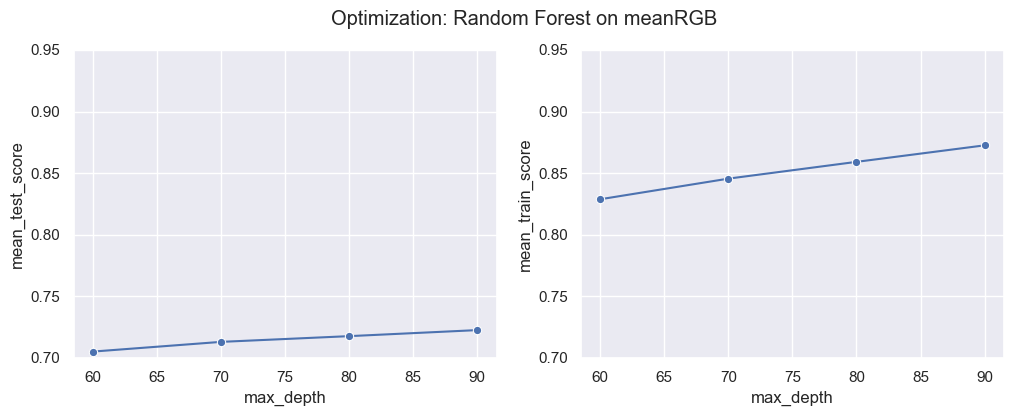

In [48]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[0])

# sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")


sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[1])

# sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0.7,0.95)
#     ax.set_xscale("log")
#     leg = ax.legend()
#     leg_lines = leg.get_lines()
# #     leg_lines[1].set_linestyle(":")
#     leg_lines[2].set_linestyle(":")
#     leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: Random Forest on meanRGB")

**Train-Test accuracy**

In [70]:
rf_accuracy_train = rf_clf.score(X_train, y_train)
rf_accuracy_test = rf_clf.score(X_test, y_test)

# rf_accuracy_train = grid_rf.score(X_train, y_train)
# rf_accuracy_test = grid_rf.score(X_test, y_test)

print("Train set accuracy %0.3f" % rf_accuracy_train)
print("Test  set accuracy %0.3f" % rf_accuracy_test)

Train set accuracy 0.977
Test  set accuracy 0.751


**Predictions**

In [71]:
y_pred = rf_clf.predict(X_test)
# y_pred = grid_rf.predict(X_test)

In [72]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


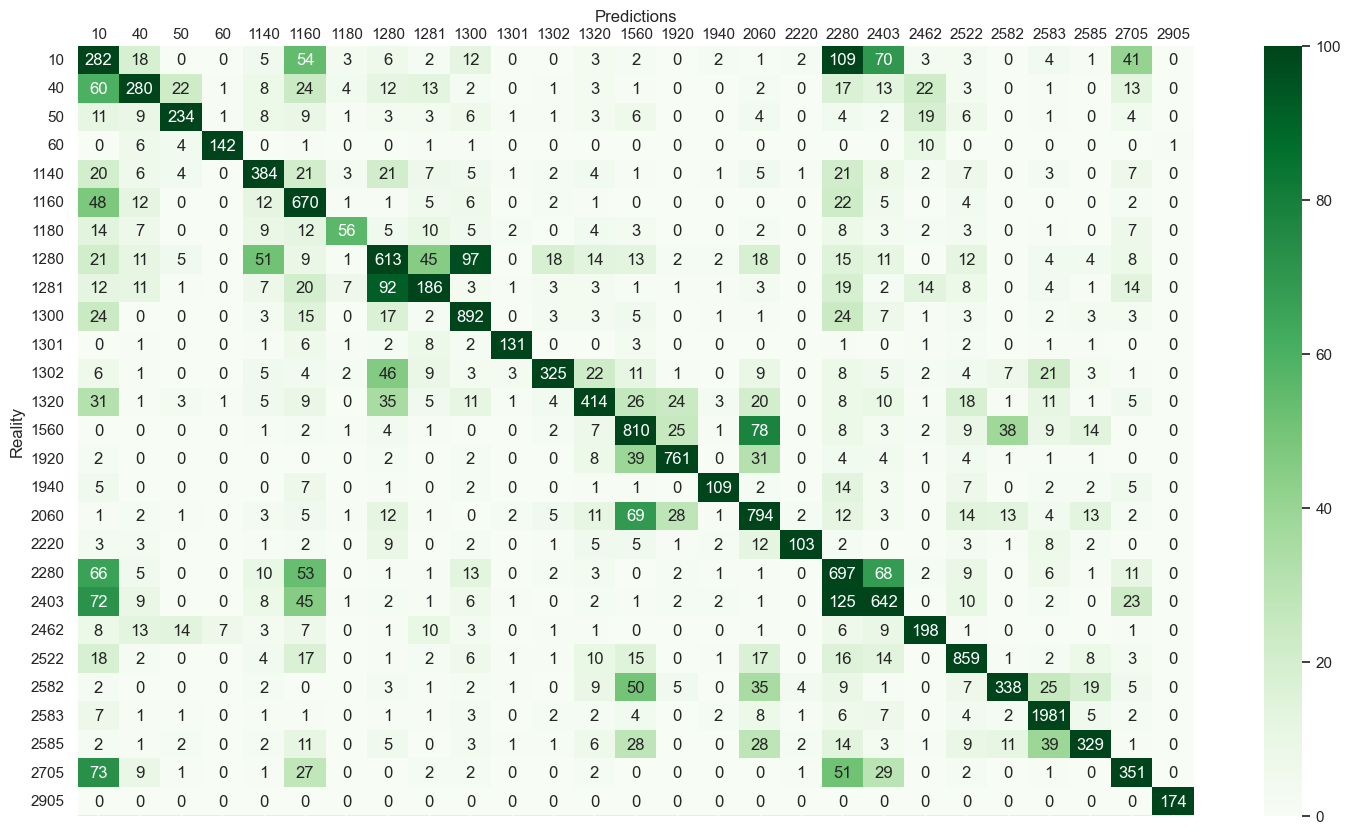

In [74]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [75]:
export = False

if export:
    filename = training_path + model_date_time + '_text_rf' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Trained_models_and_metrics/2308142209_text_rf_confusionMatrix.csv


**Classification Report: macro & micro**

In [76]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.36      0.45      0.40       623
          40       0.69      0.56      0.62       502
          50       0.80      0.70      0.75       336
          60       0.93      0.86      0.89       166
        1140       0.72      0.72      0.72       534
        1160       0.65      0.85      0.74       791
        1180       0.68      0.37      0.48       153
        1280       0.68      0.63      0.66       974
        1281       0.59      0.45      0.51       414
        1300       0.82      0.88      0.85      1009
        1301       0.90      0.81      0.85       161
        1302       0.87      0.65      0.75       498
        1320       0.77      0.64      0.70       648
        1560       0.74      0.80      0.77      1015
        1920       0.89      0.88      0.89       861
        1940       0.84      0.68      0.75       161
        2060       0.74      0.79      0.77       999
        2220       0.89    

**Top Classified Categories**

In [78]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
26,2905,0.994286,1.000000,0.997135,174.0
23,2583,0.928739,0.970127,0.948982,2042.0
3,60,0.934211,0.855422,0.893082,166.0
14,1920,0.893192,0.883856,0.888500,861.0
21,2522,0.849654,0.860721,0.855152,998.0


**Worst Classified Categories**

In [79]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
0,10,0.357868,0.452648,0.399717,623.0
6,1180,0.682927,0.366013,0.476596,153.0
8,1281,0.588608,0.449275,0.509589,414.0
1,40,0.686275,0.557769,0.615385,502.0
18,2280,0.571311,0.732143,0.641805,952.0


**Less represented categories scores**

In [80]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.682927,0.366013,0.476596,153.0
10,1301,0.897260,0.813665,0.853420,161.0
15,1940,0.844961,0.677019,0.751724,161.0
17,2220,0.887931,0.624242,0.733096,165.0
3,60,0.934211,0.855422,0.893082,166.0


**Save Classification Report**

In [81]:
export = True

if export:
    filename = training_path + model_date_time +'_text_rf' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Trained_models_and_metrics/2308142209_text_rf_classificationReport.txt


**Save trained model**

In [124]:
export = True

if export:
    filename = 'textModel_rf_trainedModel' + model_date_time + '.txt'
    print(filename)
    
    with open(filename, 'w') as file:
        file.write(json.dumps(rf_clf.get_params()))

textModel_rf_trainedModel_20230807_2330.txt


**Load pre-Trained model**

In [89]:
export = False

if export:
    filename = 'textModel_rf_trainedModel' + learnCurve_date_time + '.txt'
    
    with open(filename, 'r') as file:
        reloadedModel = json.load(file)
        
    reloadedModel

# Support Vectors Machine - SVC

In [82]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## estimator
svc_clf = svm.SVC(random_state = myseed) # kernel = 'poly', gamma = 0.01
# svc_clf = svm.SVC(C = 10, kernel = 'rbf') # kernel = 'poly', gamma = 0.01

## GridSearch
# params = {'gamma' : [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]}#,
# #          'C' : [1e3,1e4,1e5,1e6] }

# grid_svc = GridSearchCV(estimator = svc_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 3,\
#                           return_train_score=True, verbose = 3)

## training (timed)
t0 = time.time()

svc_clf.fit(X_train, y_train)
# grid_svc.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 598.15 seconds
2308150034


**Train-Test accuracy**

In [83]:
t0 = time.time()

svc_accuracy_train = svc_clf.score(X_train, y_train)
svc_accuracy_test = svc_clf.score(X_test, y_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy %0.3f" % svc_accuracy_train)
print("Test  set accuracy %0.3f" % svc_accuracy_test)

t1 = time.time()
print("Training and test set accuracy measured in %0.2f seconds" %((t1-t0) ) )

Train set accuracy 0.868
Test  set accuracy 0.776
Training and test set accuracy measured in 808.53 seconds


**Predictions**

In [84]:
t0 = time.time()

y_pred = svc_clf.predict(X_test)
# y_pred = grid_rf_px.predict(X_test)

t1 = time.time()
print("Predictions done in %0.2f seconds" %((t1-t0) ) )

Predictions done in 161.36 seconds


In [87]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


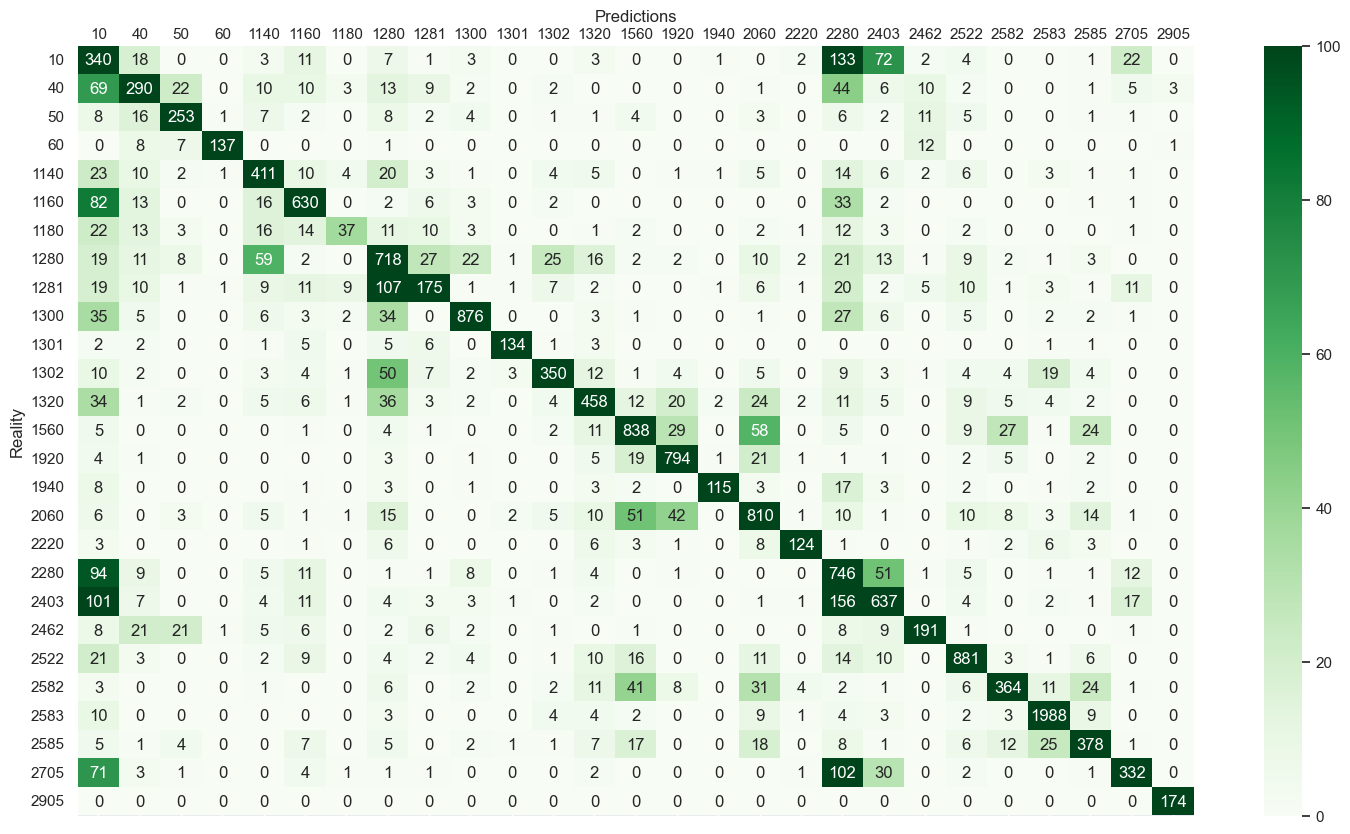

In [88]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [96]:
export = True

if export:
    filename = training_path + model_date_time + '_txt_svc' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Trained_models_and_metrics/2308150034_txt_svc_confusionMatrix.csv


**Classification Report: macro & micro**

In [97]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.34      0.55      0.42       623
          40       0.65      0.58      0.61       502
          50       0.77      0.75      0.76       336
          60       0.97      0.83      0.89       166
        1140       0.72      0.77      0.75       534
        1160       0.83      0.80      0.81       791
        1180       0.63      0.24      0.35       153
        1280       0.67      0.74      0.70       974
        1281       0.67      0.42      0.52       414
        1300       0.93      0.87      0.90      1009
        1301       0.94      0.83      0.88       161
        1302       0.85      0.70      0.77       498
        1320       0.79      0.71      0.75       648
        1560       0.83      0.83      0.83      1015
        1920       0.88      0.92      0.90       861
        1940       0.95      0.71      0.82       161
        2060       0.79      0.81      0.80       999
        2220       0.88    

**Top Classified Categories**

In [92]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
26,2905,0.977528,1.000000,0.988636,174.0
23,2583,0.959459,0.973555,0.966456,2042.0
14,1920,0.880266,0.922184,0.900737,861.0
9,1300,0.929936,0.868186,0.898001,1009.0
3,60,0.971631,0.825301,0.892508,166.0


**Worst Classified Categories**

In [93]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.627119,0.241830,0.349057,153.0
0,10,0.339321,0.545746,0.418462,623.0
8,1281,0.665399,0.422705,0.516987,414.0
1,40,0.653153,0.577689,0.613108,502.0
18,2280,0.531339,0.783613,0.633277,952.0


**Less represented categories scores**

In [94]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.627119,0.241830,0.349057,153.0
10,1301,0.937063,0.832298,0.881579,161.0
15,1940,0.950413,0.714286,0.815603,161.0
17,2220,0.879433,0.751515,0.810458,165.0
3,60,0.971631,0.825301,0.892508,166.0


**Save Classification Report**

In [99]:
export = True

if export:
    filename = training_path + model_date_time +'_txt_svc' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Trained_models_and_metrics/2308150034_txt_svc_classificationReport.txt


**Save trained model ready to use**

In [101]:
save = True
reload = False

saved_model = training_path + model_date_time + '_txt_svc_trained' + '.joblib'

from joblib import dump, load

if save:
    dump(svc_clf, saved_model) #
    print("Saved trained model:", saved_model)
    
if reload:
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

Saved trained model: ../Trained_models_and_metrics/2308150034_txt_svc_trained.joblib


# Simple Neural Network

In [60]:
XX_train = text_data['X_train']
XX_test = text_data['X_test']

yy_train = targets['y_train']
yy_test = targets['y_test']

**Define model : NN layers**

In [61]:
XX_train.shape

(67932, 5035)

In [70]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## data dimensions
Nb_features = XX_train.shape[1]
Nb_classes = yy_train.shape[1]


## instantiate layers

inputs = Input(shape = Nb_features, name = "input")

dense1 = Dense(units = 256, activation = "relu", \
               kernel_initializer ='normal', name = "dense_1")

dense2 = Dense(units = Nb_classes, activation = "softmax", \
               kernel_initializer ='normal', name = "dense_2")


## link layers & model

x = dense1(inputs)
outputs = dense2(x)

NN_clf = Model(inputs = inputs, outputs = outputs)

In [71]:
## to visualize a schema of the model

NN_clf.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5035)]            0         
                                                                 
 Dense_1 (Dense)             (None, 256)               1289216   
                                                                 
 Dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 1,296,155
Trainable params: 1,296,155
Non-trainable params: 0
_________________________________________________________________


**Define training process**

In [72]:
NN_clf.compile(loss = 'categorical_crossentropy',  
              optimizer = 'adam',                 
              metrics = ['accuracy'])             


**Train Model**

In [73]:
t0 = time.time()

training_history = NN_clf.fit(XX_train.toarray(), yy_train,          
                             epochs = 4,               
                             batch_size = 200,          
                             validation_split = 0.2)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

Epoch 1/4
272/272 [==============================] - 4s 12ms/step - loss: 1.8143 - accuracy: 0.5357 - val_loss: 1.0071 - val_accuracy: 0.7247
Epoch 2/4
272/272 [==============================] - 3s 11ms/step - loss: 0.8191 - accuracy: 0.7677 - val_loss: 0.7928 - val_accuracy: 0.7624
Epoch 3/4
272/272 [==============================] - 3s 11ms/step - loss: 0.6392 - accuracy: 0.8102 - val_loss: 0.7429 - val_accuracy: 0.7725
Epoch 4/4
272/272 [==============================] - 3s 12ms/step - loss: 0.5451 - accuracy: 0.8359 - val_loss: 0.7306 - val_accuracy: 0.7763
For 67932 observations, training time = 15.04 seconds
2308150229


**Score Evolution during training**

In [74]:
epochs = 4
x_epochs = np.arange(1,epochs + 1,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

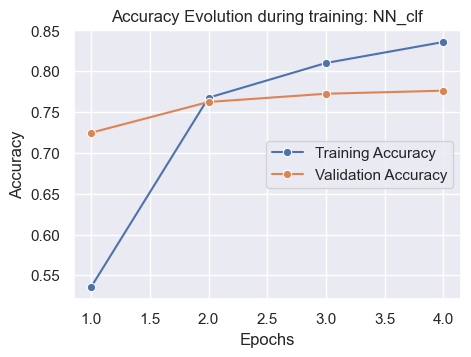

In [78]:
plt.figure(figsize=(5,3.5))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='right')
# plt.ylim(0.72,0.8)

In [79]:
val_acc

[0.7247368693351746, 0.7624199390411377, 0.772503137588501, 0.7762567400932312]

**Train-Test accuracy**

In [80]:
loss_train, NN_accuracy_train = NN_clf.evaluate(XX_train.toarray(), yy_train)
loss_test, NN_accuracy_test = NN_clf.evaluate(XX_test.toarray(), yy_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_train, loss_train) )
print("Test  set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_test, loss_test))

531/531 [==============================] - 3s 6ms/step - loss: 0.7647 - accuracy: 0.7663
Train set accuracy = 0.845 and loss function = 0.52
Test  set accuracy = 0.766 and loss function = 0.76


**Predictions**

In [86]:
yy_pred_vectors = NN_clf.predict(XX_test.toarray())

## reverse One-hot-encoding
y_pred_class = yy_pred_vectors.argmax(axis = 1)
y_test_class = yy_test.argmax(axis = 1)

## reverse label encoder
y_pred = target_encoder.inverse_transform(y_pred_class)
y_test = target_encoder.inverse_transform(y_test_class)   # should be equal to y_test



531/531 [==============================] - 3s 6ms/step


In [87]:
print(y_test)
# print(y_test.values)

[1140 1320 2582 ... 2280 2522 1920]


**Confussion Matrix**

In [88]:
categories = product_class['prdtypecode'].tolist()

y_pred_cat = pd.Categorical(y_pred, categories = categories)
y_test_cat = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(y_test_cat, y_pred_cat, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


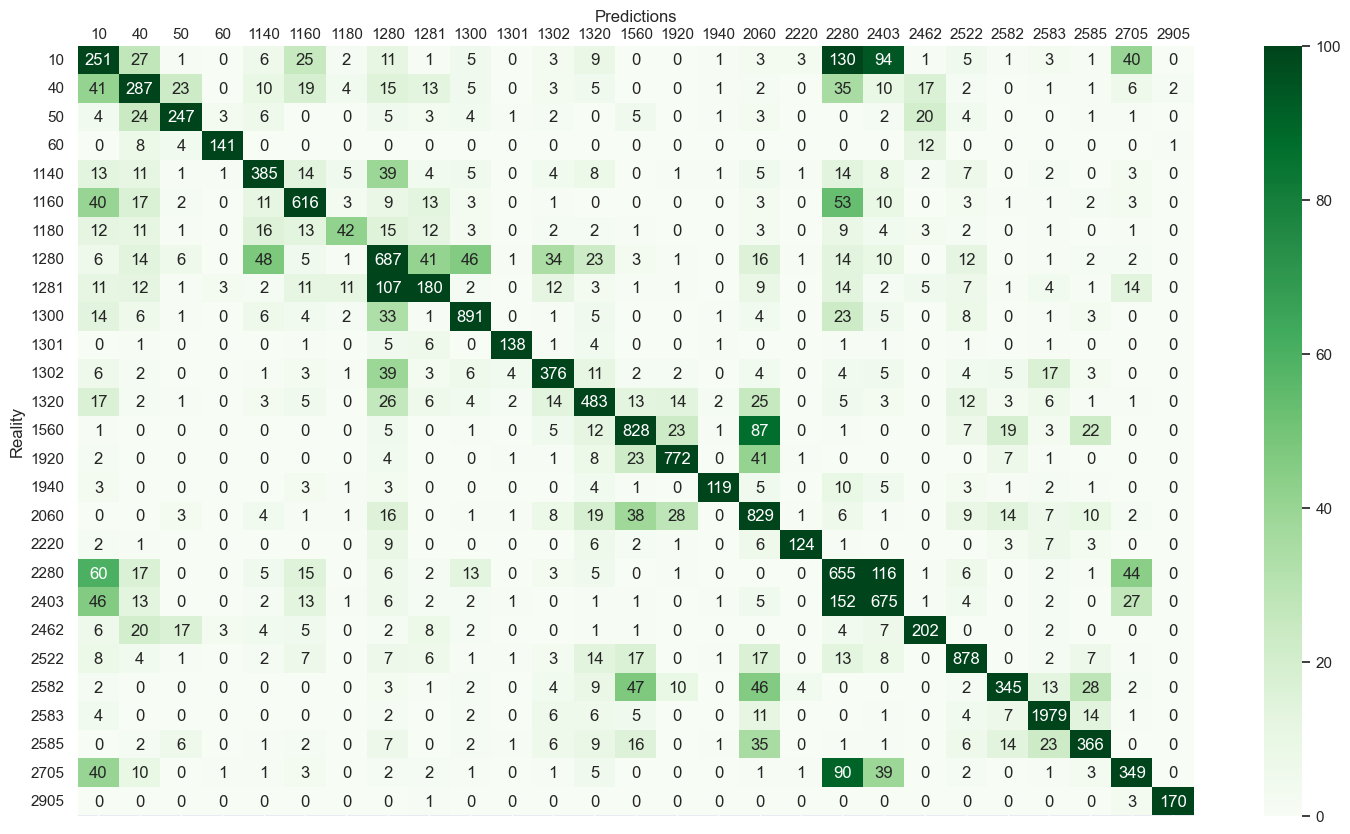

In [89]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [90]:
export = True

if export:
    filename = training_path + model_date_time + '_txt_NN' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Trained_models_and_metrics/2308150229_txt_NN_confusionMatrix.csv


**Classification Report: macro & micro**

In [91]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.43      0.40      0.41       623
          40       0.59      0.57      0.58       502
          50       0.78      0.74      0.76       336
          60       0.93      0.85      0.89       166
        1140       0.75      0.72      0.74       534
        1160       0.81      0.78      0.79       791
        1180       0.57      0.27      0.37       153
        1280       0.65      0.71      0.67       974
        1281       0.59      0.43      0.50       414
        1300       0.89      0.88      0.89      1009
        1301       0.91      0.86      0.88       161
        1302       0.77      0.76      0.76       498
        1320       0.74      0.75      0.74       648
        1560       0.82      0.82      0.82      1015
        1920       0.90      0.90      0.90       861
        1940       0.91      0.74      0.82       161
        2060       0.71      0.83      0.77       999
        2220       0.91    

**Top Classified Categories**

In [44]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
26,2905,0.994152,0.977011,0.985507,174.0
23,2583,0.961783,0.961312,0.961548,2042.0
14,1920,0.907168,0.896632,0.901869,861.0
10,1301,0.916129,0.881988,0.898734,161.0
3,60,0.912500,0.879518,0.895706,166.0


**Worst Classified Categories**

In [45]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
0,10,0.334430,0.489567,0.397394,623.0
6,1180,0.491525,0.379085,0.428044,153.0
8,1281,0.522788,0.471014,0.495553,414.0
1,40,0.565966,0.589641,0.577561,502.0
18,2280,0.597390,0.625000,0.610883,952.0


**Less represented categories scores**

In [46]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.491525,0.379085,0.428044,153.0
10,1301,0.916129,0.881988,0.898734,161.0
15,1940,0.909774,0.751553,0.823129,161.0
17,2220,0.892857,0.757576,0.819672,165.0
3,60,0.912500,0.879518,0.895706,166.0


**Save Classification Report**

In [93]:
export = True

if export:
    filename = training_path + model_date_time +'_txt_NN' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Trained_models_and_metrics/2308150229_txt_NN_classificationReport.txt


**Save trained model ready to use**

In [95]:
save = True
reload = False

saved_model = training_path + model_date_time + '_txt_NN_trained' + '.joblib'

from joblib import dump, load

if save:
    dump(NN_clf, saved_model) #
    print("Saved trained model:", saved_model)
    
if reload:
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

INFO:tensorflow:Assets written to: ram://2015b22f-7ca5-47fb-8eb7-2876c2f0c204/assets


INFO:tensorflow:Assets written to: ram://2015b22f-7ca5-47fb-8eb7-2876c2f0c204/assets


Saved trained model: ../Trained_models_and_metrics/2308150229_txt_NN_trained.joblib
